In [1]:
import tensorflow as tf
import numpy 
import os
import PIL
from PIL import Image
import cv2
import imghdr
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from skimage import io
from keras.applications.densenet import DenseNet121
from keras.applications.resnet import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.xception import Xception
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow_addons as tfa
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

2024-02-14 17:40:18.745625: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-14 17:40:18.845009: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-14 17:40:18.848290: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-14 17:40:18.848302: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

In [57]:
data_dir = "The IQ-OTHNCCD lung cancer dataset"

In [58]:
dataset = tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(224,224))

Found 1104 files belonging to 3 classes.


In [85]:
bengin_cases = os.listdir(os.path.join(data_dir,"Bengin cases"))
normal_cases = os.listdir(os.path.join(data_dir, "Normal cases"))
malignant_cases = os.listdir(os.path.join(data_dir, "Malignant cases"))

In [86]:
print(bengin_cases)

['Bengin case (15).jpg', 'Bengin case (32).jpg', 'Bengin case (87).jpg', 'Bengin case (38).jpg', 'Bengin case (81).jpg', 'Bengin case (71).jpg', 'Bengin case (106).jpg', 'Bengin case (54).jpg', 'Bengin case (117).jpg', 'Bengin case (120).jpg', 'Bengin case (76).jpg', 'Bengin case (45).jpg', 'Bengin case (79).jpg', 'Bengin case (2).jpg', 'Bengin case (28).jpg', 'Bengin case (116).jpg', 'Bengin case (19).jpg', 'Bengin case (36).jpg', 'Bengin case (112).jpg', 'Bengin case (62).jpg', 'Bengin case (113).jpg', '.ipynb_checkpoints', 'Bengin case (72).jpg', 'Bengin case (14).jpg', 'Bengin case (91).jpg', 'Bengin case (63).jpg', 'Bengin case (88).jpg', 'Bengin case (58).jpg', 'Bengin case (16).jpg', 'Bengin case (103).jpg', 'Bengin case (30).jpg', 'Bengin case (66).jpg', 'Bengin case (55).jpg', 'Bengin case (78).jpg', 'Bengin case (85).jpg', 'Bengin case (3).jpg', 'Bengin case (4).jpg', 'Bengin case (109).jpg', 'Bengin case (108).jpg', 'Bengin case (46).jpg', 'Bengin case (119).jpg', 'Bengin ca

In [87]:
bengin_dataset = []
for i in bengin_cases:
    if i == ".ipynb_checkpoints":
        continue
    img = Image.open("The IQ-OTHNCCD lung cancer dataset/Bengin cases/" + i).convert(
        "L")
    arr = numpy.array(img)
    bengin_dataset.append(arr)

In [88]:
from scipy import ndimage
filtered_bengin = []
for i in bengin_dataset:
   img = ndimage.median_filter(i, size = 3)
   filtered_bengin.append(img)

In [89]:
normal_dataset = []
for i in normal_cases:
    if i == ".ipynb_checkpoints":
        continue
    img = Image.open("The IQ-OTHNCCD lung cancer dataset/Normal cases/" + i).convert(
        "L")
    arr = numpy.array(img)
    normal_dataset.append(arr)

In [90]:
from scipy import ndimage
filtered_normal = []
for i in normal_dataset:
   img = ndimage.median_filter(i, size = 3)
   filtered_normal.append(img)

In [91]:
malignant_dataset = []
for i in malignant_cases:
    if i == ".ipynb_checkpoints":
        continue
    img = Image.open("The IQ-OTHNCCD lung cancer dataset/Malignant cases/" + i).convert(
        "L")
    arr = numpy.array(img)
    malignant_dataset.append(arr)

In [92]:
from scipy import ndimage
filtered_malignant = []
for i in malignant_dataset:
   img = ndimage.median_filter(i, size = 3)
   filtered_malignant.append(img)

In [93]:
i = 0
path = "The IQ-OTHNCCD lung cancer dataset-processed/Bengin cases"
while i < len(filtered_bengin):
    cv2.imwrite(os.path.join(path, "Bengin cases" + str(i) + ".jpg"), filtered_bengin[i])
    i+=1

In [94]:
i = 0
path = "The IQ-OTHNCCD lung cancer dataset-processed/Normal cases"
while i < len(filtered_normal):
    cv2.imwrite(os.path.join(path, "Normal cases" + str(i) + ".jpg"), filtered_normal[i])
    i+=1

In [95]:
i = 0
path = "The IQ-OTHNCCD lung cancer dataset-processed/Malignant cases"
while i < len(filtered_malignant):
    cv2.imwrite(os.path.join(path, "malignant_cases" + str(i) + ".jpg"), filtered_malignant[i])
    i+=1

In [96]:
data_dir = "The IQ-OTHNCCD lung cancer dataset-processed"

In [61]:
bengin_cases = os.listdir(os.path.join(data_dir,"Bengin cases"))
normal_cases = os.listdir(os.path.join(data_dir, "Normal cases"))
malignant_cases = os.listdir(os.path.join(data_dir, "Malignant cases"))

In [180]:
data_augmentation = tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.2)])

In [59]:
from PIL import Image as im
import matplotlib.image
def scale(data,name):
    scaled = []
    for i in data:
        if i == ".ipynb_checkpoints":
            continue
        image = cv2.imread("The IQ-OTHNCCD lung cancer dataset-processed/" + name + "/"+ i)
        image -= image.min() 
        image = image / image.max()
        image *= 255 # [0, 255] range
        cv2.imwrite("The IQ-OTHNCCD lung cancer dataset-scaled/" + name  +"/" + i, image)

In [60]:
scale(bengin_cases, "Bengin cases")
scale(normal_cases, "Normal cases")
scale(malignant_cases, "Malignant cases")

NameError: name 'bengin_cases' is not defined

In [62]:
data = "The IQ-OTHNCCD lung cancer dataset-scaled"
scaled_bengin  = os.listdir(os.path.join(data,"Bengin cases"))
scaled_normal = os.listdir(os.path.join(data, "Normal cases"))
scaled_malignant = os.listdir(os.path.join(data, "Malignant cases"))

In [63]:
def segmentation(image, name):
    
    image = cv2.imread("The IQ-OTHNCCD lung cancer dataset-scaled/" + name + "/"+ image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixel_vals = image.reshape((-1,3))
    pixel_vals = numpy.float32(pixel_vals)
    #the below line of code defines the criteria for the algorithm to stop running, 
    #which will happen is 100 iterations are run or the epsilon (which is the required accuracy) 
    #becomes 85%
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
    # then perform k-means clustering with number of clusters defined as 3
    #also random centres are initially choosed for k-means clustering
    k = 3
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
    # convert data into 8-bit values
    centers = numpy.uint8(centers)
    segmented_data = centers[labels.flatten()]
 
    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    return segmented_image            

In [64]:
segmented_bengin = []
for image in scaled_bengin:
    if image == ".ipynb_checkpoints":
        continue
    segmented_bengin.append(segmentation(image, "Bengin cases"))

In [65]:
segmented_normal = []
for image in scaled_normal:
    if image == ".ipynb_checkpoints":
        continue
    segmented_normal.append(segmentation(image, "Normal cases"))

In [66]:
segmented_malignant = []
for image in scaled_malignant:
    if image == ".ipynb_checkpoints":
        continue
    segmented_malignant.append(segmentation(image, "Malignant cases"))

In [67]:
print(len(segmented_bengin))
print(len(segmented_normal))
print(len(segmented_malignant))

120
416
561


In [111]:
i = 0
path = "The IQ-OTHNCCD lung cancer dataset-segmentated/Bengin cases"
while i < len(segmented_bengin):
    cv2.imwrite(os.path.join(path, "Bengin_cases" + str(i) + ".jpg"), segmented_bengin[i])
    i+=1

In [112]:
i = 0
path = "The IQ-OTHNCCD lung cancer dataset-segmentated/Normal cases"
while i < len(segmented_normal):
    cv2.imwrite(os.path.join(path, "Normal_cases" + str(i) + ".jpg"), segmented_normal[i])
    i+=1

In [113]:
i = 0
path = "The IQ-OTHNCCD lung cancer dataset-segmentated/Malignant cases"
while i < len(segmented_malignant):
    cv2.imwrite(os.path.join(path, "Malignant_cases" + str(i) + ".jpg"), segmented_malignant[i])
    i+=1

In [164]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [2]:
data_dir = "The IQ-OTHNCCD lung cancer dataset-segmentated"

In [3]:
dataset = tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(224,224))

Found 1097 files belonging to 3 classes.


2024-02-08 02:37:59.589728: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-08 02:37:59.589977: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/steven/.local/lib/python3.10/site-packages/cv2/../../lib64:
2024-02-08 02:37:59.590026: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/steven/.local/lib/python3.10/site-packages/cv2/../../lib64:
2024-02-08 02:37:59.590050: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not lo

In [4]:
train_size = int(len(dataset)*.7)
val_size = int(len(dataset)*.20)
test_size = int(len(dataset)*.10)

In [5]:
train = dataset.take(train_size)
val = dataset.take(val_size)
test = dataset.take(test_size)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [7]:
input_shape= (224,224, 3)

In [11]:
base_model = DenseNet121(weights=None, include_top=False, input_shape=input_shape)

In [8]:
for layer in base_model.layers:
    layer.trainable = False

NameError: name 'base_model' is not defined

In [170]:
model = Sequential()

In [171]:
model.add(base_model)

In [172]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 128)               6422656   
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 13,460,547
Trainable params: 6,423,043
Non-trainable params: 7,037,504
_________________________________________________________________


In [17]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [219]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy", f1],
)

In [9]:
logdir = "logs"

In [10]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [222]:
history = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
24/24 [==============================] - 25s 942ms/step - loss: 3.4470 - sparse_categorical_accuracy: 0.7747 - f1_score: 0.5292 - val_loss: 0.4429 - val_sparse_categorical_accuracy: 0.9062 - val_f1_score: 0.5259
Epoch 2/20
24/24 [==============================] - 22s 914ms/step - loss: 0.3352 - sparse_categorical_accuracy: 0.9128 - f1_score: 0.5284 - val_loss: 0.0577 - val_sparse_categorical_accuracy: 0.9777 - val_f1_score: 0.5298
Epoch 3/20
24/24 [==============================] - 22s 915ms/step - loss: 0.0974 - sparse_categorical_accuracy: 0.9766 - f1_score: 0.5276 - val_loss: 0.0094 - val_sparse_categorical_accuracy: 0.9955 - val_f1_score: 0.5290
Epoch 4/20
24/24 [==============================] - 22s 905ms/step - loss: 0.0310 - sparse_categorical_accuracy: 0.9922 - f1_score: 0.5295 - val_loss: 0.0340 - val_sparse_categorical_accuracy: 0.9911 - val_f1_score: 0.5294
Epoch 5/20
24/24 [==============================] - 22s 907ms/step - loss: 0.0392 - sparse_categorical_accur

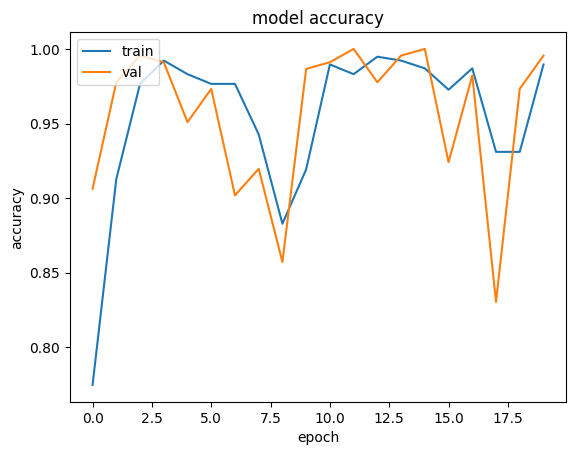

In [223]:
plt.plot(history.history["sparse_categorical_accuracy"])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

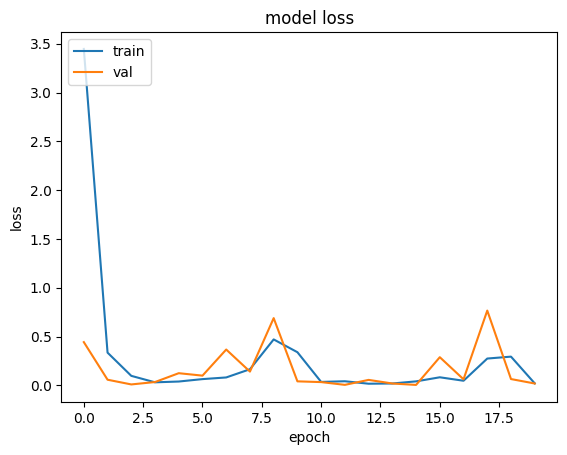

In [224]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [225]:
model.evaluate(test)

3/3 [==============================] - 2s 682ms/step - loss: 0.0095 - sparse_categorical_accuracy: 1.0000 - f1_score: 0.5235


[0.009524884633719921, 1.0, 0.5234898924827576]

In [187]:
labels = []
print(labels)
y_predictions = []
for batch in test.as_numpy_iterator():
    X,y = batch
    print(y)
    labels.append(y)
    y_pred = tf.argmax(model.predict(X), axis=1)
    print(y_pred)
    print(labels)
for pred in yhat:
    y_predictions.append(numpy.argmax(pred))
y_true = []
for label in labels:
    for i in label:
        y_true.append(i)


[]
[2 1 1 1 1 2 2 0 2 1 2 1 0 0 2 1 2 0 1 2 2 1 2 2 1 1 2 1 1 1 2 1]
1/1 [==============================] - 1s 1s/step
tf.Tensor([2 1 1 1 1 2 2 2 2 1 2 1 2 2 2 1 2 2 1 2 2 1 2 2 1 1 2 1 1 1 2 1], shape=(32,), dtype=int64)
1/1 [==============================] - 1s 723ms/step - loss: 0.0782 - sparse_categorical_accuracy: 0.9688 - f1_score: 0.5263
[array([2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int32)]


In [191]:
precision_metric = tf.keras.metrics.Precision()
precision_metric.update_state(y_true, y_pred)

print("Precision:", precision_metric.result().numpy())

Precision: 0.875


In [196]:
from sklearn.metrics import recall_score
print("Recall:", recall_score(y_true, y_pred, average = "weighted"))

Recall: 0.875


In [193]:
from sklearn.metrics import f1_score
print("F1_Score:",f1_score(y_true, y_pred, average='weighted'))

F1_Score: 0.8208333333333333


In [69]:
data_dir = "The IQ-OTHNCCD lung cancer dataset-scaled"

In [70]:
dataset = tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(224,224))

Found 1097 files belonging to 3 classes.


In [71]:
train = dataset.take(train_size)
val = dataset.take(val_size)
test = dataset.take(test_size)

In [200]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy", f1],
)

In [201]:
history = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
24/24 [==============================] - 28s 1s/step - loss: 10.8728 - sparse_categorical_accuracy: 0.6784 - f1_score: 0.5291 - val_loss: 3.4596 - val_sparse_categorical_accuracy: 0.6172 - val_f1_score: 0.5304
Epoch 2/20
24/24 [==============================] - 22s 941ms/step - loss: 1.2595 - sparse_categorical_accuracy: 0.8490 - f1_score: 0.5298 - val_loss: 1.1565 - val_sparse_categorical_accuracy: 0.8359 - val_f1_score: 0.5270
Epoch 3/20
24/24 [==============================] - 22s 936ms/step - loss: 0.3738 - sparse_categorical_accuracy: 0.9271 - f1_score: 0.5297 - val_loss: 0.4132 - val_sparse_categorical_accuracy: 0.9219 - val_f1_score: 0.5277
Epoch 4/20
24/24 [==============================] - 22s 940ms/step - loss: 0.2500 - sparse_categorical_accuracy: 0.9362 - f1_score: 0.5300 - val_loss: 0.1604 - val_sparse_categorical_accuracy: 0.9609 - val_f1_score: 0.5300
Epoch 5/20
24/24 [==============================] - 23s 959ms/step - loss: 0.1543 - sparse_categorical_accurac

In [214]:
model.evaluate(test)

1/1 [==============================] - 1s 742ms/step - loss: 1.3254 - sparse_categorical_accuracy: 0.7812 - f1_score: 0.5412


[1.325411319732666, 0.78125, 0.5411764979362488]

In [229]:
model = Sequential()
model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape= input_shape))
model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 lambda (Lambda)             (None, 56, 56, 96)        0         
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         614656    
                                                      

In [230]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy", f1],
)

In [235]:
history = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
24/24 [==============================] - 5s 179ms/step - loss: 1.2582 - sparse_categorical_accuracy: 0.4479 - f1_score: 0.1992 - val_loss: 0.9768 - val_sparse_categorical_accuracy: 0.4018 - val_f1_score: 0.1858
Epoch 2/20
24/24 [==============================] - 4s 178ms/step - loss: 0.9821 - sparse_categorical_accuracy: 0.4766 - f1_score: 0.1855 - val_loss: 0.9814 - val_sparse_categorical_accuracy: 0.4821 - val_f1_score: 0.1856
Epoch 3/20
24/24 [==============================] - 5s 189ms/step - loss: 0.9725 - sparse_categorical_accuracy: 0.4883 - f1_score: 0.1854 - val_loss: 0.9886 - val_sparse_categorical_accuracy: 0.4821 - val_f1_score: 0.1853
Epoch 4/20
24/24 [==============================] - 5s 190ms/step - loss: 0.9834 - sparse_categorical_accuracy: 0.4727 - f1_score: 0.1853 - val_loss: 0.9587 - val_sparse_categorical_accuracy: 0.5134 - val_f1_score: 0.1853
Epoch 5/20
24/24 [==============================] - 5s 190ms/step - loss: 0.9632 - sparse_categorical_accuracy: 

In [236]:
model.evaluate(test)

3/3 [==============================] - 0s 51ms/step - loss: 0.9889 - sparse_categorical_accuracy: 0.5104 - f1_score: 0.1848


[0.9888710379600525, 0.5104166865348816, 0.18483412265777588]

In [11]:
base_model = DenseNet121(weights=None, include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False
    
DenseNet121 = Sequential()
DenseNet121.add(base_model)
DenseNet121.add(Flatten())
DenseNet121.add(Dense(128, activation='relu'))
DenseNet121.add(Dense(3, activation='softmax'))

DenseNet121.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

DN_history = DenseNet121.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
24/24 [==============================] - 29s 981ms/step - loss: 41.4165 - sparse_categorical_accuracy: 0.4766 - val_loss: 1.7947 - val_sparse_categorical_accuracy: 0.6652
Epoch 2/20
24/24 [==============================] - 22s 935ms/step - loss: 2.3116 - sparse_categorical_accuracy: 0.6120 - val_loss: 0.8466 - val_sparse_categorical_accuracy: 0.7679
Epoch 3/20
24/24 [==============================] - 23s 955ms/step - loss: 0.7647 - sparse_categorical_accuracy: 0.7396 - val_loss: 0.5090 - val_sparse_categorical_accuracy: 0.7812
Epoch 4/20
24/24 [==============================] - 24s 994ms/step - loss: 0.4640 - sparse_categorical_accuracy: 0.8229 - val_loss: 0.5512 - val_sparse_categorical_accuracy: 0.8661
Epoch 5/20
24/24 [==============================] - 25s 1s/step - loss: 0.7717 - sparse_categorical_accuracy: 0.8125 - val_loss: 1.0984 - val_sparse_categorical_accuracy: 0.8438
Epoch 6/20
24/24 [==============================] - 27s 1s/step - loss: 0.7891 - sparse_categoric

In [12]:
DenseNet121.evaluate(test)

3/3 [==============================] - 2s 673ms/step - loss: 0.1061 - sparse_categorical_accuracy: 0.9479


[0.10606133937835693, 0.9479166865348816]

In [ ]:
labels = []
print(labels)
y_predictions = []
for batch in test.as_numpy_iterator():
    X,y = batch
    print(y)
    labels.append(y)
    y_pred = tf.argmax(DenseNet121.predict(X), axis=1)
    print(y_pred)
    print(labels)

y_true = []
for label in labels:
    for i in label:
        y_true.append(i)

In [13]:
base_model = ResNet50(weights=None, include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

ResNet50 = Sequential()
ResNet50.add(base_model)
ResNet50.add(Flatten())
ResNet50.add(Dense(128, activation='relu'))
ResNet50.add(Dense(3, activation='softmax'))

ResNet50.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

RN_history = ResNet50.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
24/24 [==============================] - 25s 999ms/step - loss: 206.4208 - sparse_categorical_accuracy: 0.4583 - val_loss: 43.8787 - val_sparse_categorical_accuracy: 0.7054
Epoch 2/20
24/24 [==============================] - 24s 997ms/step - loss: 19.3776 - sparse_categorical_accuracy: 0.7344 - val_loss: 4.7878 - val_sparse_categorical_accuracy: 0.8393
Epoch 3/20
24/24 [==============================] - 24s 997ms/step - loss: 2.9486 - sparse_categorical_accuracy: 0.8711 - val_loss: 0.6091 - val_sparse_categorical_accuracy: 0.9420
Epoch 4/20
24/24 [==============================] - 24s 1s/step - loss: 0.3946 - sparse_categorical_accuracy: 0.9544 - val_loss: 0.4320 - val_sparse_categorical_accuracy: 0.9554
Epoch 5/20
24/24 [==============================] - 26s 1s/step - loss: 1.0325 - sparse_categorical_accuracy: 0.9336 - val_loss: 0.0278 - val_sparse_categorical_accuracy: 0.9911
Epoch 6/20
24/24 [==============================] - 26s 1s/step - loss: 6.0056 - sparse_categoric

In [19]:
ResNet50.evaluate(test)

3/3 [==============================] - 2s 738ms/step - loss: 2.3835 - sparse_categorical_accuracy: 0.8958


[2.3834946155548096, 0.8958333134651184]

In [24]:
base_model = VGG16(weights=None, include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False
    
VGG16 = Sequential()
VGG16.add(base_model)
VGG16.add(Flatten())
VGG16.add(Dense(128, activation='relu'))
VGG16.add(Dense(3, activation='softmax'))

VGG16.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

VGG_history = VGG16.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

ValueError: The first argument to `Layer.call` must always be passed.

In [27]:
base_model = Xception(weights=None, include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False
    
Xception = Sequential()
Xception.add(base_model)
Xception.add(Flatten())
Xception.add(Dense(128, activation='relu'))
Xception.add(Dense(3, activation='softmax'))

Xception.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

Xception_history = Xception.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
24/24 [==============================] - 27s 1s/step - loss: 0.8341 - sparse_categorical_accuracy: 0.6549 - val_loss: 0.6325 - val_sparse_categorical_accuracy: 0.7634
Epoch 2/20
24/24 [==============================] - 26s 1s/step - loss: 0.5899 - sparse_categorical_accuracy: 0.7812 - val_loss: 0.5368 - val_sparse_categorical_accuracy: 0.8259
Epoch 3/20
24/24 [==============================] - 26s 1s/step - loss: 0.4565 - sparse_categorical_accuracy: 0.8464 - val_loss: 0.4012 - val_sparse_categorical_accuracy: 0.8571
Epoch 4/20
24/24 [==============================] - 26s 1s/step - loss: 0.3927 - sparse_categorical_accuracy: 0.8724 - val_loss: 0.3804 - val_sparse_categorical_accuracy: 0.9152
Epoch 5/20
24/24 [==============================] - 28s 1s/step - loss: 0.3392 - sparse_categorical_accuracy: 0.8984 - val_loss: 0.2089 - val_sparse_categorical_accuracy: 0.9643
Epoch 6/20
24/24 [==============================] - 27s 1s/step - loss: 0.2701 - sparse_categorical_accuracy: 

In [28]:
Xception.evaluate(test)

3/3 [==============================] - 2s 789ms/step - loss: 0.0192 - sparse_categorical_accuracy: 1.0000


[0.019165297970175743, 1.0]

In [ ]:
model = Sequential()
model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape= input_shape))
model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [33]:
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False
    
DenseNet121 = Sequential()
DenseNet121.add(base_model)
DenseNet121.add(Flatten())
DenseNet121.add(Dense(128, activation='relu'))
DenseNet121.add(Dense(3, activation='softmax'))

DenseNet121.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

DN_history = DenseNet121.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

29084464/29084464 [==============================] - 9s 0us/step
Epoch 1/20
24/24 [==============================] - 26s 969ms/step - loss: 93.3497 - sparse_categorical_accuracy: 0.5625 - val_loss: 11.8732 - val_sparse_categorical_accuracy: 0.7634
Epoch 2/20
24/24 [==============================] - 23s 954ms/step - loss: 6.4556 - sparse_categorical_accuracy: 0.8034 - val_loss: 2.4827 - val_sparse_categorical_accuracy: 0.7946
Epoch 3/20
24/24 [==============================] - 23s 968ms/step - loss: 5.3841 - sparse_categorical_accuracy: 0.7982 - val_loss: 1.8971 - val_sparse_categorical_accuracy: 0.8482
Epoch 4/20
24/24 [==============================] - 22s 917ms/step - loss: 2.6402 - sparse_categorical_accuracy: 0.8451 - val_loss: 1.2611 - val_sparse_categorical_accuracy: 0.9107
Epoch 5/20
24/24 [==============================] - 22s 911ms/step - loss: 1.2073 - sparse_categorical_accuracy: 0.9115 - val_loss: 0.6897 - val_sparse_categorical_accuracy: 0.9241
Epoch 6/20
24/24 [==========

In [34]:
data_dir = "The IQ-OTHNCCD lung cancer dataset-scaled"

In [35]:
dataset = tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(224,224))

Found 1097 files belonging to 3 classes.


In [36]:
train = dataset.take(train_size)
val = dataset.take(val_size)
test = dataset.take(test_size)

In [43]:
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=input_shape)

DenseNet121 = Sequential()
DenseNet121.add(base_model)
DenseNet121.add(Flatten())
DenseNet121.add(Dense(128, activation='relu'))
DenseNet121.add(Dense(3, activation='softmax'))

DenseNet121.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

DN_history = DenseNet121.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
24/24 [==============================] - 66s 2s/step - loss: 4.1636 - sparse_categorical_accuracy: 0.7227 - val_loss: 553.3798 - val_sparse_categorical_accuracy: 0.4821
Epoch 2/20
24/24 [==============================] - 56s 2s/step - loss: 0.5202 - sparse_categorical_accuracy: 0.8190 - val_loss: 10540.7334 - val_sparse_categorical_accuracy: 0.4911
Epoch 3/20
24/24 [==============================] - 57s 2s/step - loss: 0.3668 - sparse_categorical_accuracy: 0.8529 - val_loss: 18.4131 - val_sparse_categorical_accuracy: 0.5491
Epoch 4/20
24/24 [==============================] - 57s 2s/step - loss: 0.2391 - sparse_categorical_accuracy: 0.8867 - val_loss: 12.7960 - val_sparse_categorical_accuracy: 0.5089
Epoch 5/20
24/24 [==============================] - 57s 2s/step - loss: 0.2022 - sparse_categorical_accuracy: 0.9128 - val_loss: 2.7069 - val_sparse_categorical_accuracy: 0.4955
Epoch 6/20
24/24 [==============================] - 57s 2s/step - loss: 0.1056 - sparse_categorical_ac

In [45]:
DenseNet121.evaluate(test)

3/3 [==============================] - 2s 682ms/step - loss: 1.0123 - sparse_categorical_accuracy: 0.8021


[1.0123449563980103, 0.8020833134651184]

In [56]:
base_model = DenseNet121(weights=None, include_top=False, input_shape=input_shape)

DenseNet121 = Sequential()
DenseNet121.add(base_model)
DenseNet121.add(Flatten())
DenseNet121.add(Dense(128, activation='relu'))
DenseNet121.add(Dense(3, activation='softmax'))

DenseNet121.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

DN_history = DenseNet121.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
24/24 [==============================] - 65s 2s/step - loss: 6.2549 - sparse_categorical_accuracy: 0.5365 - val_loss: 31329.2070 - val_sparse_categorical_accuracy: 0.5134
Epoch 2/20
24/24 [==============================] - 55s 2s/step - loss: 0.6364 - sparse_categorical_accuracy: 0.7643 - val_loss: 4082.1548 - val_sparse_categorical_accuracy: 0.4955
Epoch 3/20
24/24 [==============================] - 58s 2s/step - loss: 0.5114 - sparse_categorical_accuracy: 0.8034 - val_loss: 372.9387 - val_sparse_categorical_accuracy: 0.5000
Epoch 4/20
24/24 [==============================] - 56s 2s/step - loss: 0.3136 - sparse_categorical_accuracy: 0.8906 - val_loss: 112.5973 - val_sparse_categorical_accuracy: 0.4598
Epoch 5/20
24/24 [==============================] - 56s 2s/step - loss: 0.2363 - sparse_categorical_accuracy: 0.9141 - val_loss: 17.4983 - val_sparse_categorical_accuracy: 0.5223
Epoch 6/20
24/24 [==============================] - 56s 2s/step - loss: 0.1900 - sparse_categorica

In [59]:
DenseNet121.evaluate(test)

3/3 [==============================] - 2s 682ms/step - loss: 2.8042 - sparse_categorical_accuracy: 0.6979


[2.8042452335357666, 0.6979166865348816]

In [60]:
base_model = Xception(weights=None, include_top=False, input_shape=input_shape)

Xception = Sequential()
Xception.add(base_model)
Xception.add(Flatten())
Xception.add(Dense(128, activation='relu'))
Xception.add(Dense(3, activation='softmax'))

Xception.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

Xception_history = Xception.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
24/24 [==============================] - 76s 3s/step - loss: 4.2354 - sparse_categorical_accuracy: 0.6823 - val_loss: 1.0987 - val_sparse_categorical_accuracy: 0.1295
Epoch 2/20
24/24 [==============================] - 70s 3s/step - loss: 0.1916 - sparse_categorical_accuracy: 0.9297 - val_loss: 1.0991 - val_sparse_categorical_accuracy: 0.1027
Epoch 3/20
24/24 [==============================] - 72s 3s/step - loss: 0.1311 - sparse_categorical_accuracy: 0.9479 - val_loss: 1.0991 - val_sparse_categorical_accuracy: 0.0938
Epoch 4/20
24/24 [==============================] - 74s 3s/step - loss: 0.0455 - sparse_categorical_accuracy: 0.9870 - val_loss: 1.0990 - val_sparse_categorical_accuracy: 0.1250
Epoch 5/20
24/24 [==============================] - 72s 3s/step - loss: 0.0297 - sparse_categorical_accuracy: 0.9883 - val_loss: 1.0990 - val_sparse_categorical_accuracy: 0.1339
Epoch 6/20
24/24 [==============================] - 72s 3s/step - loss: 0.0080 - sparse_categorical_accuracy: 

In [61]:
Xception.evaluate(test)

3/3 [==============================] - 2s 765ms/step - loss: 0.7012 - sparse_categorical_accuracy: 0.7396


[0.701207160949707, 0.7395833134651184]

In [64]:
base_model = DenseNet121(weights=None, include_top=False, input_shape=input_shape)

DenseNet121 = Sequential()
DenseNet121.add(base_model)
DenseNet121.add(Flatten())
DenseNet121.add(Dense(128, activation='relu'))
DenseNet121.add(Dense(3, activation='softmax'))

DenseNet121.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

DN_history = DenseNet121.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/100
24/24 [==============================] - 77s 2s/step - loss: 5.3016 - sparse_categorical_accuracy: 0.5312 - val_loss: 69408.0391 - val_sparse_categorical_accuracy: 0.3839
Epoch 2/100
24/24 [==============================] - 52s 2s/step - loss: 1.8935 - sparse_categorical_accuracy: 0.6146 - val_loss: 1648.4833 - val_sparse_categorical_accuracy: 0.4821
Epoch 3/100
24/24 [==============================] - 55s 2s/step - loss: 0.9423 - sparse_categorical_accuracy: 0.6940 - val_loss: 77.0103 - val_sparse_categorical_accuracy: 0.5446
Epoch 4/100
24/24 [==============================] - 56s 2s/step - loss: 1.0134 - sparse_categorical_accuracy: 0.7865 - val_loss: 1412.8182 - val_sparse_categorical_accuracy: 0.4107
Epoch 5/100
24/24 [==============================] - 56s 2s/step - loss: 1.0174 - sparse_categorical_accuracy: 0.7695 - val_loss: 273.8299 - val_sparse_categorical_accuracy: 0.3884
Epoch 6/100
24/24 [==============================] - 56s 2s/step - loss: 0.9432 - sparse_cat

In [65]:
DenseNet121.evaluate(test)

3/3 [==============================] - 2s 685ms/step - loss: 3.3639e-04 - sparse_categorical_accuracy: 1.0000


[0.0003363934811204672, 1.0]

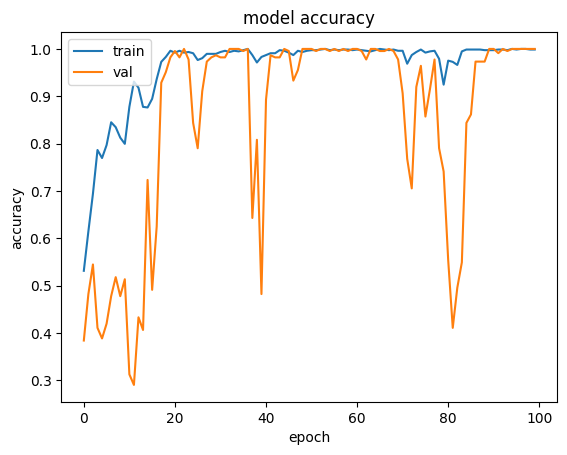

In [67]:
plt.plot(DN_history.history["sparse_categorical_accuracy"])
plt.plot(DN_history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

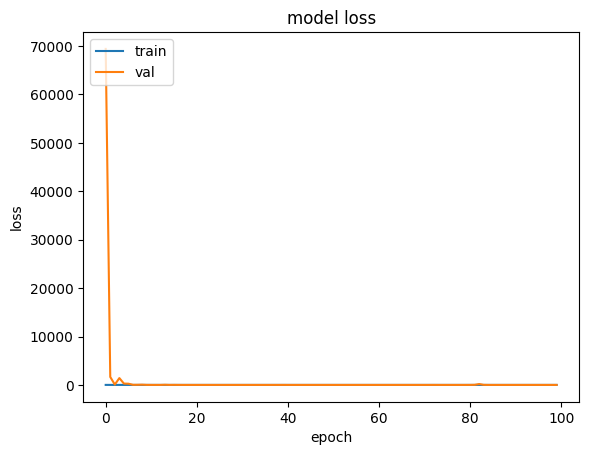

In [68]:
plt.plot(DN_history.history['loss'])
plt.plot(DN_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [74]:
base_model = DenseNet121(weights=None, include_top=False, input_shape=input_shape)

DenseNet121 = Sequential()
DenseNet121.add(base_model)
DenseNet121.add(Flatten())
DenseNet121.add(Dense(128, activation='relu'))
DenseNet121.add(Dense(3, activation='softmax'))

DenseNet121.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

DN_history = DenseNet121.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/100
24/24 [==============================] - 78s 2s/step - loss: 6.6531 - sparse_categorical_accuracy: 0.6120 - val_loss: 81451.1953 - val_sparse_categorical_accuracy: 0.4911
Epoch 2/100
24/24 [==============================] - 52s 2s/step - loss: 0.8708 - sparse_categorical_accuracy: 0.6914 - val_loss: 4299.8809 - val_sparse_categorical_accuracy: 0.5402
Epoch 3/100
24/24 [==============================] - 60s 3s/step - loss: 0.6146 - sparse_categorical_accuracy: 0.7656 - val_loss: 743.3874 - val_sparse_categorical_accuracy: 0.5446
Epoch 4/100
24/24 [==============================] - 61s 3s/step - loss: 0.4041 - sparse_categorical_accuracy: 0.8503 - val_loss: 170.4469 - val_sparse_categorical_accuracy: 0.5759
Epoch 5/100
24/24 [==============================] - 57s 2s/step - loss: 0.2971 - sparse_categorical_accuracy: 0.8867 - val_loss: 49.0659 - val_sparse_categorical_accuracy: 0.5670
Epoch 6/100
24/24 [==============================] - 66s 3s/step - loss: 0.2139 - sparse_cate

In [79]:
loss, accuracy = DenseNet121.evaluate(test)
DN_Metrics = {"Accuracy":0, "Loss":0, "Recall":0, "Precision":0, "F1":0}

3/3 [==============================] - 2s 715ms/step - loss: 1.3902e-05 - sparse_categorical_accuracy: 1.0000


In [82]:
DN_Metrics["Loss"] = loss
print(DN_Metrics)

{'Accuracy': 0, 'Loss': 1.3902026694267988e-05, 'Recall': 0, 'Precision': 0, 'F1': 0}


# Segmentated Results.

In [11]:
data_dir = "The IQ-OTHNCCD lung cancer dataset-segmentated"
dataset = tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(224,224))

Found 1097 files belonging to 3 classes.


In [12]:
train_size = int(len(dataset)*.7)
val_size = int(len(dataset)*.20)
test_size = int(len(dataset)*.10)

In [13]:
train = dataset.take(train_size)
val = dataset.take(val_size)
test = dataset.take(test_size)

In [14]:
input_shape= (224,224, 3)

In [15]:
logdir = "logs"

In [16]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

## Scenario  1: Pre-trained / Training frozen on base model.

### DenseNet121 Results.

In [110]:
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False
    
DenseNet121 = Sequential()
DenseNet121.add(base_model)
DenseNet121.add(Flatten())
DenseNet121.add(Dense(128, activation='relu'))
DenseNet121.add(Dense(3, activation='softmax'))

DenseNet121.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

DN_history = DenseNet121.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/100
24/24 [==============================] - 26s 985ms/step - loss: 68.0020 - sparse_categorical_accuracy: 0.5560 - val_loss: 10.3014 - val_sparse_categorical_accuracy: 0.7634
Epoch 2/100
24/24 [==============================] - 24s 988ms/step - loss: 4.8037 - sparse_categorical_accuracy: 0.8372 - val_loss: 1.9558 - val_sparse_categorical_accuracy: 0.8482
Epoch 3/100
24/24 [==============================] - 23s 951ms/step - loss: 1.4194 - sparse_categorical_accuracy: 0.8164 - val_loss: 0.9521 - val_sparse_categorical_accuracy: 0.7589
Epoch 4/100
24/24 [==============================] - 22s 917ms/step - loss: 0.6236 - sparse_categorical_accuracy: 0.8555 - val_loss: 0.3657 - val_sparse_categorical_accuracy: 0.8839
Epoch 5/100
24/24 [==============================] - 23s 965ms/step - loss: 0.2248 - sparse_categorical_accuracy: 0.9154 - val_loss: 0.1853 - val_sparse_categorical_accuracy: 0.9152
Epoch 6/100
24/24 [==============================] - 24s 995ms/step - loss: 0.1691 - spa

In [111]:
DN_Metrics = {"Accuracy":0, "Loss":0 , "Recall":0, "Precision":0, "F1":0}

In [112]:
loss, accuracy = DenseNet121.evaluate(test) 

3/3 [==============================] - 2s 738ms/step - loss: 4.8635e-04 - sparse_categorical_accuracy: 1.0000


In [113]:
labels = []
y_pred = []
for batch in test.as_numpy_iterator():
    X,y = batch
    labels.append(y)
    y_predictions = tf.argmax(DenseNet121.predict(X), axis=1)
    for pred in y_predictions: 
        y_pred.append(pred)
y_true = []
for label in labels:
    for i in label:
        y_true.append(i)

print(len(y_true))

1/1 [==============================] - 1s 734ms/step
96


In [114]:
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average = "weighted")
f1 = f1_score(y_true, y_pred, average='weighted')

In [115]:
DN_Metrics["Accuracy"] = accuracy
DN_Metrics["Loss"] = loss
DN_Metrics["Precision"] = precision
DN_Metrics["Recall"] = recall
DN_Metrics["F1"] = f1

In [116]:
print(DN_Metrics)

{'Accuracy': 1.0, 'Loss': 0.00048634500126354396, 'Recall': 1.0, 'Precision': 1.0, 'F1': 1.0}


### ResNet50 Results.

In [117]:
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

ResNet50 = Sequential()
ResNet50.add(base_model)
ResNet50.add(Flatten())
ResNet50.add(Dense(128, activation='relu'))
ResNet50.add(Dense(3, activation='softmax'))

ResNet50.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

RN_history = ResNet50.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

94765736/94765736 [==============================] - 13s 0us/step
Epoch 1/100
24/24 [==============================] - 26s 1s/step - loss: 22.1625 - sparse_categorical_accuracy: 0.7474 - val_loss: 1.3704 - val_sparse_categorical_accuracy: 0.7768
Epoch 2/100
24/24 [==============================] - 24s 1s/step - loss: 1.3471 - sparse_categorical_accuracy: 0.9102 - val_loss: 0.1105 - val_sparse_categorical_accuracy: 0.9821
Epoch 3/100
24/24 [==============================] - 24s 1s/step - loss: 0.3360 - sparse_categorical_accuracy: 0.9648 - val_loss: 0.0313 - val_sparse_categorical_accuracy: 0.9955
Epoch 4/100
24/24 [==============================] - 24s 1s/step - loss: 0.0507 - sparse_categorical_accuracy: 0.9922 - val_loss: 0.0041 - val_sparse_categorical_accuracy: 0.9955
Epoch 5/100
24/24 [==============================] - 25s 1s/step - loss: 0.0046 - sparse_categorical_accuracy: 0.9987 - val_loss: 7.7936e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/100
24/24 [===============

In [118]:
RN_Metrics = {"Accuracy":0, "Loss":0, "Recall":0, "Precision":0, "F1":0}

In [119]:
loss, accuracy = ResNet50.evaluate(test)

3/3 [==============================] - 2s 723ms/step - loss: 2.5740e-06 - sparse_categorical_accuracy: 1.0000


In [128]:
labels = []
y_pred = []
for batch in test.as_numpy_iterator():
    X,y = batch
    labels.append(y)
    y_predictions = tf.argmax(ResNet50.predict(X), axis=1)
    for pred in y_predictions: 
        y_pred.append(pred)
y_true = []
for label in labels:
    for i in label:
        y_true.append(i)

1/1 [==============================] - 1s 732ms/step


In [129]:
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average = "weighted")
f1 = f1_score(y_true, y_pred, average='weighted')

In [130]:
RN_Metrics["Accuracy"] = accuracy
RN_Metrics["Loss"] = loss
RN_Metrics["Precision"] = precision
RN_Metrics["Recall"] = recall
RN_Metrics["F1"] = f1

In [131]:
print(RN_Metrics)

{'Accuracy': 1.0, 'Loss': 8.443964816251537e-08, 'Recall': 1.0, 'Precision': 1.0, 'F1': 1.0}


### Xception Results.

In [124]:
base_model = Xception(weights="imagenet", include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False
    
Xception = Sequential()
Xception.add(base_model)
Xception.add(Flatten())
Xception.add(Dense(128, activation='relu'))
Xception.add(Dense(3, activation='softmax'))

Xception.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

Xception_history = Xception.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/100
24/24 [==============================] - 29s 1s/step - loss: 71.0077 - sparse_categorical_accuracy: 0.6237 - val_loss: 5.8168 - val_sparse_categorical_accuracy: 0.8571
Epoch 2/100
24/24 [==============================] - 26s 1s/step - loss: 4.1802 - sparse_categorical_accuracy: 0.8086 - val_loss: 0.5342 - val_sparse_categorical_accuracy: 0.9196
Epoch 3/100
24/24 [==============================] - 26s 1s/step - loss: 0.8104 - sparse_categorical_accuracy: 0.9271 - val_loss: 0.1994 - val_sparse_categorical_accuracy: 0.9688
Epoch 4/100
24/24 [==============================] - 27s 1s/step - loss: 0.2972 - sparse_categorical_accuracy: 0.9688 - val_loss: 0.1544 - val_sparse_categorical_accuracy: 0.9821
Epoch 5/100
24/24 [==============================] - 28s 1s/step - loss: 0.3512 - sparse_categorical_accuracy: 0.9740 - val_loss: 9.7193e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 28s 1s/step - loss: 0.2274 - sparse_categorical

In [125]:
X_Metrics = {"Accuracy":0, "Loss":0, "Recall":0, "Precision":0, "F1":0}

In [126]:
loss, accuracy = Xception.evaluate(test)

3/3 [==============================] - 2s 773ms/step - loss: 8.4440e-08 - sparse_categorical_accuracy: 1.0000


In [132]:
labels = []
y_pred = []
for batch in test.as_numpy_iterator():
    X,y = batch
    labels.append(y)
    y_predictions = tf.argmax(Xception.predict(X), axis=1)
    for pred in y_predictions: 
        y_pred.append(pred)
y_true = []
for label in labels:
    for i in label:
        y_true.append(i)

1/1 [==============================] - 1s 776ms/step


In [133]:
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average = "weighted")
f1 = f1_score(y_true, y_pred, average='weighted')

In [134]:
X_Metrics["Accuracy"] = accuracy
X_Metrics["Loss"] = loss
X_Metrics["Precision"] = precision
X_Metrics["Recall"] = recall
X_Metrics["F1"] = f1

In [135]:
print(X_Metrics)

{'Accuracy': 1.0, 'Loss': 8.443964816251537e-08, 'Recall': 1.0, 'Precision': 1.0, 'F1': 1.0}


## Scernario 2: Not Pre-trained / Training frozen on base model.

### DenseNet121 Results.

In [ ]:
base_model = DenseNet121(weights=None, include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False
    
DenseNet121 = Sequential()
DenseNet121.add(base_model)
DenseNet121.add(Flatten())
DenseNet121.add(Dense(128, activation='relu'))
DenseNet121.add(Dense(3, activation='softmax'))

DenseNet121.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

DN_history = DenseNet121.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

### ResNet50 Results.

In [ ]:
base_model = ResNet50(weights = None, include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

ResNet50 = Sequential()
ResNet50.add(base_model)
ResNet50.add(Flatten())
ResNet50.add(Dense(128, activation='relu'))
ResNet50.add(Dense(3, activation='softmax'))

ResNet50.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

RN_history = ResNet50.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

### Xception Results.

In [ ]:
base_model = Xception(weights=None, include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False
    
Xception = Sequential()
Xception.add(base_model)
Xception.add(Flatten())
Xception.add(Dense(128, activation='relu'))
Xception.add(Dense(3, activation='softmax'))

Xception.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

Xception_history = Xception.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

## Scernario 3: Pre-trained  / Training not frozen on base model.

### DenseNet121 Results.

In [ ]:
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=input_shape)

DenseNet121 = Sequential()
DenseNet121.add(base_model)
DenseNet121.add(Flatten())
DenseNet121.add(Dense(128, activation='relu'))
DenseNet121.add(Dense(3, activation='softmax'))

DenseNet121.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

DN_history = DenseNet121.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

### ResNet50 Results.

In [ ]:
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)


ResNet50 = Sequential()
ResNet50.add(base_model)
ResNet50.add(Flatten())
ResNet50.add(Dense(128, activation='relu'))
ResNet50.add(Dense(3, activation='softmax'))

ResNet50.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

RN_history = ResNet50.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

### Xception Results.

In [ ]:
base_model = Xception(weights="imagenet", include_top=False, input_shape=input_shape)


Xception = Sequential()
Xception.add(base_model)
Xception.add(Flatten())
Xception.add(Dense(128, activation='relu'))
Xception.add(Dense(3, activation='softmax'))

Xception.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

Xception_history = Xception.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

## Scernario 4: Not Pre-trained / Training not frozen on base model.

### DenseNet121 Results.

In [138]:
base_model = DenseNet121(weights=None, include_top=False, input_shape=input_shape)

DenseNet121 = Sequential()
DenseNet121.add(base_model)
DenseNet121.add(Flatten())
DenseNet121.add(Dense(128, activation='relu'))
DenseNet121.add(Dense(3, activation='softmax'))

DenseNet121.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

DN_history = DenseNet121.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/100
24/24 [==============================] - 71s 2s/step - loss: 9.0431 - sparse_categorical_accuracy: 0.5182 - val_loss: 42144.8828 - val_sparse_categorical_accuracy: 0.1071
Epoch 2/100
24/24 [==============================] - 54s 2s/step - loss: 0.8061 - sparse_categorical_accuracy: 0.7305 - val_loss: 10270.2490 - val_sparse_categorical_accuracy: 0.1295
Epoch 3/100
24/24 [==============================] - 57s 2s/step - loss: 0.4809 - sparse_categorical_accuracy: 0.8138 - val_loss: 1127.5929 - val_sparse_categorical_accuracy: 0.1027
Epoch 4/100
24/24 [==============================] - 57s 2s/step - loss: 0.3608 - sparse_categorical_accuracy: 0.8542 - val_loss: 87.8844 - val_sparse_categorical_accuracy: 0.3259
Epoch 5/100
24/24 [==============================] - 57s 2s/step - loss: 0.2388 - sparse_categorical_accuracy: 0.9036 - val_loss: 70.7682 - val_sparse_categorical_accuracy: 0.1696
Epoch 6/100
24/24 [==============================] - 57s 2s/step - loss: 0.1414 - sparse_cat

In [139]:
DN_Metrics = {"Accuracy":0, "Loss":0 , "Recall":0, "Precision":0, "F1":0}

In [151]:
loss, accuracy = DenseNet121.evaluate(test)

3/3 [==============================] - 2s 684ms/step - loss: 0.1336 - sparse_categorical_accuracy: 0.9688


In [152]:
labels = []
y_pred = []
for batch in test.as_numpy_iterator():
    X,y = batch
    labels.append(y)
    y_predictions = tf.argmax(DenseNet121.predict(X), axis=1)
    for pred in y_predictions: 
        y_pred.append(pred)
y_true = []
for label in labels:
    for i in label:
        y_true.append(i)

1/1 [==============================] - 1s 687ms/step


In [153]:
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average = "weighted")
f1 = f1_score(y_true, y_pred, average='weighted')

In [154]:
DN_Metrics["Accuracy"] = accuracy
DN_Metrics["Loss"] = loss
DN_Metrics["Precision"] = precision
DN_Metrics["Recall"] = recall
DN_Metrics["F1"] = f1

In [155]:
print(DN_Metrics)

{'Accuracy': 0.96875, 'Loss': 0.13356222212314606, 'Recall': 0.9479166666666666, 'Precision': 0.9547697368421053, 'F1': 0.9485195262483995}


### ResNet50 Results.

In [156]:
base_model = ResNet50(weights=None, include_top=False, input_shape=input_shape)


ResNet50 = Sequential()
ResNet50.add(base_model)
ResNet50.add(Flatten())
ResNet50.add(Dense(128, activation='relu'))
ResNet50.add(Dense(3, activation='softmax'))

ResNet50.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

RN_history = ResNet50.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/100
24/24 [==============================] - 59s 2s/step - loss: 28.5774 - sparse_categorical_accuracy: 0.4062 - val_loss: 17891536.0000 - val_sparse_categorical_accuracy: 0.3973
Epoch 2/100
24/24 [==============================] - 56s 2s/step - loss: 2.9294 - sparse_categorical_accuracy: 0.5612 - val_loss: 553577.1250 - val_sparse_categorical_accuracy: 0.3527
Epoch 3/100
24/24 [==============================] - 58s 2s/step - loss: 3.4181 - sparse_categorical_accuracy: 0.5846 - val_loss: 6181.1045 - val_sparse_categorical_accuracy: 0.3661
Epoch 4/100
24/24 [==============================] - 61s 3s/step - loss: 5.5209 - sparse_categorical_accuracy: 0.5221 - val_loss: 21970.1211 - val_sparse_categorical_accuracy: 0.3750
Epoch 5/100
24/24 [==============================] - 59s 2s/step - loss: 2.0559 - sparse_categorical_accuracy: 0.5859 - val_loss: 330.2283 - val_sparse_categorical_accuracy: 0.3527
Epoch 6/100
24/24 [==============================] - 60s 3s/step - loss: 1.1281 - s

In [157]:
RN_Metrics = {"Accuracy":0, "Loss":0, "Recall":0, "Precision":0, "F1":0}

In [158]:
loss, accuracy = ResNet50.evaluate(test)

3/3 [==============================] - 2s 796ms/step - loss: 3.0832e-06 - sparse_categorical_accuracy: 1.0000


In [159]:
labels = []
y_pred = []
for batch in test.as_numpy_iterator():
    X,y = batch
    labels.append(y)
    y_predictions = tf.argmax(ResNet50.predict(X), axis=1)
    for pred in y_predictions: 
        y_pred.append(pred)
y_true = []
for label in labels:
    for i in label:
        y_true.append(i)

1/1 [==============================] - 1s 824ms/step


In [160]:
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average = "weighted")
f1 = f1_score(y_true, y_pred, average='weighted')

In [161]:
RN_Metrics["Accuracy"] = accuracy
RN_Metrics["Loss"] = loss
RN_Metrics["Precision"] = precision
RN_Metrics["Recall"] = recall
RN_Metrics["F1"] = f1

In [162]:
print(RN_Metrics)

{'Accuracy': 1.0, 'Loss': 3.0832391075819032e-06, 'Recall': 1.0, 'Precision': 1.0, 'F1': 1.0}


### Xception Results.

In [163]:
base_model = Xception(weights=None, include_top=False, input_shape=input_shape)


Xception = Sequential()
Xception.add(base_model)
Xception.add(Flatten())
Xception.add(Dense(128, activation='relu'))
Xception.add(Dense(3, activation='softmax'))

Xception.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

Xception_history = Xception.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback]) 

Epoch 1/100
24/24 [==============================] - 80s 3s/step - loss: 4.4141 - sparse_categorical_accuracy: 0.6823 - val_loss: 1.0982 - val_sparse_categorical_accuracy: 0.3438
Epoch 2/100
24/24 [==============================] - 73s 3s/step - loss: 0.1838 - sparse_categorical_accuracy: 0.9492 - val_loss: 1.0983 - val_sparse_categorical_accuracy: 0.5446
Epoch 3/100
24/24 [==============================] - 82s 3s/step - loss: 0.0772 - sparse_categorical_accuracy: 0.9701 - val_loss: 1.0985 - val_sparse_categorical_accuracy: 0.5312
Epoch 4/100
24/24 [==============================] - 75s 3s/step - loss: 0.0544 - sparse_categorical_accuracy: 0.9779 - val_loss: 1.0984 - val_sparse_categorical_accuracy: 0.5580
Epoch 5/100
24/24 [==============================] - 73s 3s/step - loss: 0.0631 - sparse_categorical_accuracy: 0.9740 - val_loss: 1.0983 - val_sparse_categorical_accuracy: 0.5536
Epoch 6/100
24/24 [==============================] - 74s 3s/step - loss: 0.0495 - sparse_categorical_accu

In [164]:
X_Metrics = {"Accuracy":0, "Loss":0, "Recall":0, "Precision":0, "F1":0}

In [165]:
loss, accuracy = Xception.evaluate(test)

3/3 [==============================] - 2s 776ms/step - loss: 3.9115e-07 - sparse_categorical_accuracy: 1.0000


In [166]:
labels = []
y_pred = []
for batch in test.as_numpy_iterator():
    X,y = batch
    labels.append(y)
    y_predictions = tf.argmax(Xception.predict(X), axis=1)
    for pred in y_predictions: 
        y_pred.append(pred)
y_true = []
for label in labels:
    for i in label:
        y_true.append(i)

1/1 [==============================] - 1s 798ms/step


In [167]:
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average = "weighted")
f1 = f1_score(y_true, y_pred, average='weighted')

In [168]:
X_Metrics["Accuracy"] = accuracy
X_Metrics["Loss"] = loss
X_Metrics["Precision"] = precision
X_Metrics["Recall"] = recall
X_Metrics["F1"] = f1

In [169]:
print(X_Metrics)

{'Accuracy': 1.0, 'Loss': 3.9115488448260294e-07, 'Recall': 1.0, 'Precision': 1.0, 'F1': 1.0}


### AlexNet Results.

In [17]:
AlexNet = Sequential()
AlexNet.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape= input_shape))
AlexNet.add(layers.Conv2D(96, 11, strides=4, padding='same'))
AlexNet.add(layers.Lambda(tf.nn.local_response_normalization))
AlexNet.add(layers.Activation('relu'))
AlexNet.add(layers.MaxPooling2D(3, strides=2))
AlexNet.add(layers.Conv2D(256, 5, strides=4, padding='same'))
AlexNet.add(layers.Lambda(tf.nn.local_response_normalization))
AlexNet.add(layers.Activation('relu'))
AlexNet.add(layers.MaxPooling2D(3, strides=2))
AlexNet.add(layers.Conv2D(384, 3, strides=4, padding='same'))
AlexNet.add(layers.Activation('relu'))
AlexNet.add(layers.Conv2D(384, 3, strides=4, padding='same'))
AlexNet.add(layers.Activation('relu'))
AlexNet.add(layers.Conv2D(256, 3, strides=4, padding='same'))
AlexNet.add(layers.Activation('relu'))
AlexNet.add(layers.Flatten())
AlexNet.add(layers.Dense(4096, activation='relu'))
AlexNet.add(layers.Dropout(0.5))
AlexNet.add(layers.Dense(4096, activation='relu'))
AlexNet.add(layers.Dropout(0.5))
AlexNet.add(layers.Dense(3, activation='softmax'))

In [18]:
AlexNet.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

In [20]:
AN_history = AlexNet.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/100
24/24 [==============================] - 5s 179ms/step - loss: 1.0056 - sparse_categorical_accuracy: 0.4909 - val_loss: 0.9464 - val_sparse_categorical_accuracy: 0.5045
Epoch 2/100
24/24 [==============================] - 4s 173ms/step - loss: 0.9686 - sparse_categorical_accuracy: 0.5065 - val_loss: 0.9467 - val_sparse_categorical_accuracy: 0.5134
Epoch 3/100
24/24 [==============================] - 4s 174ms/step - loss: 0.9707 - sparse_categorical_accuracy: 0.5078 - val_loss: 0.9334 - val_sparse_categorical_accuracy: 0.5268
Epoch 4/100
24/24 [==============================] - 4s 174ms/step - loss: 0.9682 - sparse_categorical_accuracy: 0.5130 - val_loss: 0.9656 - val_sparse_categorical_accuracy: 0.4866
Epoch 5/100
24/24 [==============================] - 4s 172ms/step - loss: 0.9674 - sparse_categorical_accuracy: 0.5169 - val_loss: 0.9408 - val_sparse_categorical_accuracy: 0.5312
Epoch 6/100
24/24 [==============================] - 4s 173ms/step - loss: 0.9645 - sparse_cate

### VGG Results.

In [21]:
base_model = VGG16(weights=None, include_top=False, input_shape=input_shape)
   
VGG16 = Sequential()
VGG16.add(base_model)
VGG16.add(Flatten())
VGG16.add(Dense(128, activation='relu'))
VGG16.add(Dense(3, activation='softmax'))

VGG16.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

VGG_history = VGG16.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/100
24/24 [==============================] - 170s 7s/step - loss: 175.5893 - sparse_categorical_accuracy: 0.4557 - val_loss: 0.9548 - val_sparse_categorical_accuracy: 0.4955
Epoch 2/100
24/24 [==============================] - 173s 7s/step - loss: 0.9714 - sparse_categorical_accuracy: 0.5091 - val_loss: 0.9852 - val_sparse_categorical_accuracy: 0.4911
Epoch 3/100
24/24 [==============================] - 175s 7s/step - loss: 0.9405 - sparse_categorical_accuracy: 0.5130 - val_loss: 0.8770 - val_sparse_categorical_accuracy: 0.5804
Epoch 4/100
24/24 [==============================] - 172s 7s/step - loss: 0.8915 - sparse_categorical_accuracy: 0.5716 - val_loss: 0.7666 - val_sparse_categorical_accuracy: 0.6920
Epoch 5/100
24/24 [==============================] - 172s 7s/step - loss: 0.8252 - sparse_categorical_accuracy: 0.6289 - val_loss: 0.7943 - val_sparse_categorical_accuracy: 0.6741
Epoch 6/100
24/24 [==============================] - 172s 7s/step - loss: 0.8014 - sparse_categori

In [27]:
loss, accuracy = VGG16.evaluate(test) 

3/3 [==============================] - 7s 2s/step - loss: 0.0038 - sparse_categorical_accuracy: 1.0000


In [23]:
VGG16.save(os.path.join("models","VGG16.h5"))

In [24]:
labels = []
y_pred = []
for batch in test.as_numpy_iterator():
    X,y = batch
    labels.append(y)
    y_predictions = tf.argmax(VGG16.predict(X), axis=1)
    for pred in y_predictions: 
        y_pred.append(pred)
y_true = []
for label in labels:
    for i in label:
        y_true.append(i)

1/1 [==============================] - 2s 2s/step


In [31]:
VGG16_Metrics = {"Accuracy":0, "Loss":0, "Recall":0, "Precision":0, "F1":0}

In [32]:
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average = "weighted")
f1 = f1_score(y_true, y_pred, average='weighted')

In [33]:
VGG16_Metrics["Accuracy"] = accuracy
VGG16_Metrics["Loss"] = loss
VGG16_Metrics["Precision"] = precision
VGG16_Metrics["Recall"] = recall
VGG16_Metrics["F1"] = f1

In [34]:
print(VGG16_Metrics)

{'Accuracy': 1.0, 'Loss': 0.0037810991052538157, 'Recall': 1.0, 'Precision': 1.0, 'F1': 1.0}


In [192]:
import pandas as pd
Models = ["DenseNet121" , "ResNet50", "Xception"]
comparison = pd.DataFrame([DN_Metrics, RN_Metrics, X_Metrics], Models)
comparison

,Accuracy,Loss,Recall,Precision,F1
DenseNet121,0.96875,1.335622e-01,0.947917,0.95477,0.94852
ResNet50,1.00000,3.083239e-06,1.000000,1.00000,1.00000
Xception,1.00000,3.911549e-07,1.000000,1.00000,1.00000


In [193]:
DenseNet121.save(os.path.join("models","DenseNet121.h5"))
ResNet50.save(os.path.join("models","ResNet50.h5"))
Xception.save(os.path.join("models","Xception.h5"))

# Un-Segmentated Results.

In [4]:
data_dir = "The IQ-OTHNCCD lung cancer dataset-scaled"
dataset = tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(224,224))

Found 1097 files belonging to 3 classes.


2024-02-08 20:48:57.289807: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-08 20:48:57.290051: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/steven/.local/lib/python3.10/site-packages/cv2/../../lib64:
2024-02-08 20:48:57.290241: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/steven/.local/lib/python3.10/site-packages/cv2/../../lib64:
2024-02-08 20:48:57.290266: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not lo

In [5]:
train_size = int(len(dataset)*.7)
val_size = int(len(dataset)*.20)
test_size = int(len(dataset)*.10)

In [37]:
train = dataset.take(train_size)
val = dataset.take(val_size)
test = dataset.take(test_size)

In [3]:
input_shape= (224,224, 3)

In [4]:
logdir = "logs"

In [5]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

## Scenario  1: Pre-trained / Training frozen on base model.

### DenseNet121 Results.

In [ ]:
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False
    
DenseNet121 = Sequential()
DenseNet121.add(base_model)
DenseNet121.add(Flatten())
DenseNet121.add(Dense(128, activation='relu'))
DenseNet121.add(Dense(3, activation='softmax'))

DenseNet121.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

DN_history = DenseNet121.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

### ResNet50 Results.

In [ ]:
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

ResNet50 = Sequential()
ResNet50.add(base_model)
ResNet50.add(Flatten())
ResNet50.add(Dense(128, activation='relu'))
ResNet50.add(Dense(3, activation='softmax'))

ResNet50.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

RN_history = ResNet50.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

### Xception Results.

In [ ]:
base_model = Xception(weights="imagenet", include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False
    
Xception = Sequential()
Xception.add(base_model)
Xception.add(Flatten())
Xception.add(Dense(128, activation='relu'))
Xception.add(Dense(3, activation='softmax'))

Xception.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

Xception_history = Xception.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

In [ ]:
compare =  pd.DataFrame()

## Scernario 2: Not Pre-trained / Training frozen on base model.

### DenseNet121 Results.

In [ ]:
base_model = DenseNet121(weights=None, include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False
    
DenseNet121 = Sequential()
DenseNet121.add(base_model)
DenseNet121.add(Flatten())
DenseNet121.add(Dense(128, activation='relu'))
DenseNet121.add(Dense(3, activation='softmax'))

DenseNet121.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

DN_history = DenseNet121.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

### ResNet50 Results.

In [ ]:
base_model = ResNet50(weights = None, include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

ResNet50 = Sequential()
ResNet50.add(base_model)
ResNet50.add(Flatten())
ResNet50.add(Dense(128, activation='relu'))
ResNet50.add(Dense(3, activation='softmax'))

ResNet50.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

RN_history = ResNet50.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

### Xception Results.

In [ ]:
base_model = Xception(weights=None, include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False
    
Xception = Sequential()
Xception.add(base_model)
Xception.add(Flatten())
Xception.add(Dense(128, activation='relu'))
Xception.add(Dense(3, activation='softmax'))

Xception.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

Xception_history = Xception.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

## Scernario 3: Pre-trained  / Training not frozen on base model.

### DenseNet121 Results.

In [ ]:
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=input_shape)

DenseNet121 = Sequential()
DenseNet121.add(base_model)
DenseNet121.add(Flatten())
DenseNet121.add(Dense(128, activation='relu'))
DenseNet121.add(Dense(3, activation='softmax'))

DenseNet121.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

DN_history = DenseNet121.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

### ResNet50 Results.

In [ ]:
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)


ResNet50 = Sequential()
ResNet50.add(base_model)
ResNet50.add(Flatten())
ResNet50.add(Dense(128, activation='relu'))
ResNet50.add(Dense(3, activation='softmax'))

ResNet50.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

RN_history = ResNet50.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

### Xception Results.

In [ ]:
base_model = Xception(weights="imagenet", include_top=False, input_shape=input_shape)


Xception = Sequential()
Xception.add(base_model)
Xception.add(Flatten())
Xception.add(Dense(128, activation='relu'))
Xception.add(Dense(3, activation='softmax'))

Xception.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

Xception_history = Xception.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

## Scernario 4: Not Pre-trained / Training not frozen on base model.

### DenseNet121 Results.

In [41]:
base_model = DenseNet121(weights=None, include_top=False, input_shape=input_shape)

DenseNet121 = Sequential()
DenseNet121.add(base_model)
DenseNet121.add(Flatten())
DenseNet121.add(Dense(128, activation='relu'))
DenseNet121.add(Dense(3, activation='softmax'))

DenseNet121.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

DN_history = DenseNet121.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/100
24/24 [==============================] - 84s 2s/step - loss: 6.5352 - sparse_categorical_accuracy: 0.5430 - val_loss: 32159.5840 - val_sparse_categorical_accuracy: 0.5446
Epoch 2/100
24/24 [==============================] - 62s 3s/step - loss: 0.7662 - sparse_categorical_accuracy: 0.7292 - val_loss: 2075.3699 - val_sparse_categorical_accuracy: 0.5848
Epoch 3/100
24/24 [==============================] - 65s 3s/step - loss: 0.5565 - sparse_categorical_accuracy: 0.7773 - val_loss: 292.6344 - val_sparse_categorical_accuracy: 0.5491
Epoch 4/100
24/24 [==============================] - 63s 3s/step - loss: 0.4945 - sparse_categorical_accuracy: 0.8138 - val_loss: 87.4601 - val_sparse_categorical_accuracy: 0.5223
Epoch 5/100
24/24 [==============================] - 57s 2s/step - loss: 0.4299 - sparse_categorical_accuracy: 0.8333 - val_loss: 32.4336 - val_sparse_categorical_accuracy: 0.5089
Epoch 6/100
24/24 [==============================] - 56s 2s/step - loss: 0.2848 - sparse_categ

In [42]:
DenseNet121.evaluate(test)

3/3 [==============================] - 2s 757ms/step - loss: 0.0268 - sparse_categorical_accuracy: 0.9896


[0.026840612292289734, 0.9895833134651184]

### ResNet50 Results.

In [43]:
base_model = ResNet50(weights=None, include_top=False, input_shape=input_shape)


ResNet50 = Sequential()
ResNet50.add(base_model)
ResNet50.add(Flatten())
ResNet50.add(Dense(128, activation='relu'))
ResNet50.add(Dense(3, activation='softmax'))

ResNet50.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

RN_history = ResNet50.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/100
24/24 [==============================] - 68s 2s/step - loss: 25.5192 - sparse_categorical_accuracy: 0.4688 - val_loss: 1154424.3750 - val_sparse_categorical_accuracy: 0.4196
Epoch 2/100
24/24 [==============================] - 59s 2s/step - loss: 2.3155 - sparse_categorical_accuracy: 0.5443 - val_loss: 140970.5312 - val_sparse_categorical_accuracy: 0.3795
Epoch 3/100
24/24 [==============================] - 59s 2s/step - loss: 0.9849 - sparse_categorical_accuracy: 0.6341 - val_loss: 631.4821 - val_sparse_categorical_accuracy: 0.3839
Epoch 4/100
24/24 [==============================] - 59s 2s/step - loss: 0.7380 - sparse_categorical_accuracy: 0.7122 - val_loss: 1.2143 - val_sparse_categorical_accuracy: 0.5893
Epoch 5/100
24/24 [==============================] - 59s 2s/step - loss: 0.5960 - sparse_categorical_accuracy: 0.7917 - val_loss: 1.2285 - val_sparse_categorical_accuracy: 0.5000
Epoch 6/100
24/24 [==============================] - 59s 2s/step - loss: 0.4129 - sparse_ca

In [45]:
ResNet50.evaluate(test)

3/3 [==============================] - 2s 725ms/step - loss: 5.5069e-05 - sparse_categorical_accuracy: 1.0000


[5.506922389031388e-05, 1.0]

### Xception Results.

In [ ]:
base_model = Xception(weights=None, include_top=False, input_shape=input_shape)


Xception = Sequential()
Xception.add(base_model)
Xception.add(Flatten())
Xception.add(Dense(128, activation='relu'))
Xception.add(Dense(3, activation='softmax'))

Xception.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

Xception_history = Xception.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback]) 

# Data Augmentation Testing.

In [91]:
# Importing necessary functions
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
  
# Initialising the ImageDataGenerator class.
# We will pass in the augmentation parameters in the constructor.
datagen = ImageDataGenerator(
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))

for j in malignant_cases:
    if j == ".ipynb_checkpoints":
        continue
    img = load_img("The IQ-OTHNCCD lung cancer dataset-segmentated/Malignant cases/" + j) 
# Converting the input sample image to an array
    x = img_to_array(img)
# Reshaping the input image
    x = x.reshape((1, ) + x.shape) 
  
# Generating and saving 5 augmented samples 
# using the above defined parameters. 
    i = 0
    for batch in datagen.flow(x, batch_size = 1,
                          save_to_dir ='dataset/Malignant cases', 
                          save_prefix = j, save_format ='jpeg'):
        i += 1
        if i > 5:
            break

In [36]:
data_dir = "test1"
bengin_cases = os.listdir(os.path.join(data_dir,"Bengin cases"))
normal_cases = os.listdir(os.path.join(data_dir, "Normal cases"))
malignant_cases = os.listdir(os.path.join(data_dir, "Malignant cases"))

In [38]:

print(len(bengin_cases))

840


# Data Augmented testing

In [2]:
data_dir = "test1"
dataset = tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(224,224))

Found 1696 files belonging to 3 classes.


2024-02-09 04:20:49.353775: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-09 04:20:49.354014: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/steven/.local/lib/python3.10/site-packages/cv2/../../lib64:
2024-02-09 04:20:49.354243: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/steven/.local/lib/python3.10/site-packages/cv2/../../lib64:
2024-02-09 04:20:49.354272: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not lo

In [7]:
train_size = int(len(dataset)*.7)
val_size = int(len(dataset)*.20)
test_size = int(len(dataset)*.10)

In [8]:
train = dataset.take(train_size)
val = dataset.take(val_size)
test = dataset.take(test_size)

In [9]:
input_shape= (224,224, 3)

In [10]:
logdir = "logs"

In [11]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [48]:
base_model = DenseNet121(weights=None, include_top=False, input_shape=input_shape)

DenseNet121 = Sequential()
DenseNet121.add(base_model)
DenseNet121.add(Flatten())
DenseNet121.add(Dense(128, activation='relu'))
DenseNet121.add(Dense(3, activation='softmax'))

DenseNet121.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

DN_history = DenseNet121.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/100
24/24 [==============================] - 65s 2s/step - loss: 2.8123 - sparse_categorical_accuracy: 0.6510 - val_loss: 24367920.0000 - val_sparse_categorical_accuracy: 0.4241
Epoch 2/100
24/24 [==============================] - 64s 3s/step - loss: 0.4354 - sparse_categorical_accuracy: 0.7513 - val_loss: 2189651.2500 - val_sparse_categorical_accuracy: 0.4062
Epoch 3/100
24/24 [==============================] - 62s 3s/step - loss: 0.4918 - sparse_categorical_accuracy: 0.8190 - val_loss: 870245.1875 - val_sparse_categorical_accuracy: 0.4152
Epoch 4/100
24/24 [==============================] - 58s 2s/step - loss: 0.2701 - sparse_categorical_accuracy: 0.8932 - val_loss: 492433.6875 - val_sparse_categorical_accuracy: 0.4107
Epoch 5/100
24/24 [==============================] - 58s 2s/step - loss: 0.2463 - sparse_categorical_accuracy: 0.8867 - val_loss: 96576.3984 - val_sparse_categorical_accuracy: 0.4330
Epoch 6/100
24/24 [==============================] - 61s 3s/step - loss: 0.201

In [49]:
DN_Metrics = {"Accuracy":0, "Loss":0 , "Recall":0, "Precision":0, "F1":0}

In [50]:
loss, accuracy = DenseNet121.evaluate(test)

3/3 [==============================] - 2s 694ms/step - loss: 1.1835e-05 - sparse_categorical_accuracy: 1.0000


In [51]:
labels = []
y_pred = []
for batch in test.as_numpy_iterator():
    X,y = batch
    labels.append(y)
    y_predictions = tf.argmax(DenseNet121.predict(X), axis=1)
    for pred in y_predictions: 
        y_pred.append(pred)
y_true = []
for label in labels:
    for i in label:
        y_true.append(i)

1/1 [==============================] - 1s 739ms/step


In [52]:
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average = "weighted")
f1 = f1_score(y_true, y_pred, average='weighted')

In [53]:
DN_Metrics["Accuracy"] = accuracy
DN_Metrics["Loss"] = loss
DN_Metrics["Precision"] = precision
DN_Metrics["Recall"] = recall
DN_Metrics["F1"] = f1

In [54]:
print(DN_Metrics)

{'Accuracy': 1.0, 'Loss': 1.1835309123853222e-05, 'Recall': 1.0, 'Precision': 1.0, 'F1': 1.0}


In [55]:
DenseNet121.save(os.path.join("models","DenseNet121.h5"))

In [56]:
base_model = Xception(weights=None, include_top=False, input_shape=input_shape)


Xception = Sequential()
Xception.add(base_model)
Xception.add(Flatten())
Xception.add(Dense(128, activation='relu'))
Xception.add(Dense(3, activation='softmax'))

Xception.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

Xception_history = Xception.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/100
24/24 [==============================] - 82s 3s/step - loss: 2.5257 - sparse_categorical_accuracy: 0.6706 - val_loss: 1.0973 - val_sparse_categorical_accuracy: 0.5938
Epoch 2/100
24/24 [==============================] - 75s 3s/step - loss: 0.4392 - sparse_categorical_accuracy: 0.7357 - val_loss: 1.0988 - val_sparse_categorical_accuracy: 0.3214
Epoch 3/100
24/24 [==============================] - 73s 3s/step - loss: 0.4051 - sparse_categorical_accuracy: 0.7292 - val_loss: 1.0979 - val_sparse_categorical_accuracy: 0.4152
Epoch 4/100
24/24 [==============================] - 73s 3s/step - loss: 0.3908 - sparse_categorical_accuracy: 0.7656 - val_loss: 1.0966 - val_sparse_categorical_accuracy: 0.4018
Epoch 5/100
24/24 [==============================] - 73s 3s/step - loss: 0.3559 - sparse_categorical_accuracy: 0.8281 - val_loss: 1.0959 - val_sparse_categorical_accuracy: 0.3973
Epoch 6/100
24/24 [==============================] - 73s 3s/step - loss: 0.2457 - sparse_categorical_accu

In [57]:
X_Metrics = {"Accuracy":0, "Loss":0, "Recall":0, "Precision":0, "F1":0}

In [58]:
loss, accuracy = Xception.evaluate(test)

3/3 [==============================] - 3s 895ms/step - loss: 1.1540e-04 - sparse_categorical_accuracy: 1.0000


In [59]:
labels = []
y_pred = []
for batch in test.as_numpy_iterator():
    X,y = batch
    labels.append(y)
    y_predictions = tf.argmax(Xception.predict(X), axis=1)
    for pred in y_predictions: 
        y_pred.append(pred)
y_true = []
for label in labels:
    for i in label:
        y_true.append(i)

1/1 [==============================] - 1s 882ms/step


In [60]:
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average = "weighted")
f1 = f1_score(y_true, y_pred, average='weighted')

In [61]:
X_Metrics["Accuracy"] = accuracy
X_Metrics["Loss"] = loss
X_Metrics["Precision"] = precision
X_Metrics["Recall"] = recall
X_Metrics["F1"] = f1

In [62]:
print(X_Metrics)

{'Accuracy': 1.0, 'Loss': 0.00011540137347765267, 'Recall': 1.0, 'Precision': 1.0, 'F1': 1.0}


In [87]:
Xception.save(os.path.join("models","Xception.h5"))

In [12]:
base_model = ResNet50(weights=None, include_top=False, input_shape=input_shape)


ResNet50 = Sequential()
ResNet50.add(base_model)
ResNet50.add(Flatten())
ResNet50.add(Dense(128, activation='relu'))
ResNet50.add(Dense(3, activation='softmax'))

ResNet50.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

RN_history = ResNet50.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/100
37/37 [==============================] - 87s 2s/step - loss: 18.1783 - sparse_categorical_accuracy: 0.5650 - val_loss: 114835.8750 - val_sparse_categorical_accuracy: 0.4094
Epoch 2/100
37/37 [==============================] - 88s 2s/step - loss: 0.5382 - sparse_categorical_accuracy: 0.7213 - val_loss: 42.5190 - val_sparse_categorical_accuracy: 0.4719
Epoch 3/100
37/37 [==============================] - 89s 2s/step - loss: 0.3826 - sparse_categorical_accuracy: 0.7872 - val_loss: 2.2942 - val_sparse_categorical_accuracy: 0.2281
Epoch 4/100
37/37 [==============================] - 89s 2s/step - loss: 0.2763 - sparse_categorical_accuracy: 0.8885 - val_loss: 2.6954 - val_sparse_categorical_accuracy: 0.2656
Epoch 5/100
37/37 [==============================] - 89s 2s/step - loss: 0.1350 - sparse_categorical_accuracy: 0.9586 - val_loss: 3.0748 - val_sparse_categorical_accuracy: 0.2438
Epoch 6/100
37/37 [==============================] - 89s 2s/step - loss: 0.0223 - sparse_categoric

In [13]:
RN_Metrics = {"Accuracy":0, "Loss":0, "Recall":0, "Precision":0, "F1":0}

In [14]:
loss, accuracy = ResNet50.evaluate(test)

5/5 [==============================] - 4s 736ms/step - loss: 3.9761e-04 - sparse_categorical_accuracy: 1.0000


In [16]:
labels = []
y_pred = []
for batch in test.as_numpy_iterator():
    X,y = batch
    labels.append(y)
    y_predictions = tf.argmax(ResNet50.predict(X), axis=1)
    for pred in y_predictions: 
        y_pred.append(pred)
y_true = []
for label in labels:
    for i in label:
        y_true.append(i)

1/1 [==============================] - 1s 742ms/step


In [19]:
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average = "weighted")
f1 = f1_score(y_true, y_pred, average='weighted')

In [20]:
RN_Metrics["Accuracy"] = accuracy
RN_Metrics["Loss"] = loss
RN_Metrics["Precision"] = precision
RN_Metrics["Recall"] = recall
RN_Metrics["F1"] = f1

In [21]:
print(RN_Metrics)

{'Accuracy': 1.0, 'Loss': 0.0003976106527261436, 'Recall': 1.0, 'Precision': 1.0, 'F1': 1.0}


In [22]:
ResNet50.save(os.path.join("models","ResNet50.h5"))

# Custom Datset

## Pre-processing

### Combining Both Datsets into one - Cancer / Non-cancer.

In [2]:
data_dir = "The IQ-OTHNCCD lung cancer dataset"

In [5]:
bengin_cases = os.listdir(os.path.join(data_dir,"Bengin cases"))
normal_cases = os.listdir(os.path.join(data_dir, "Normal cases"))
malignant_cases = os.listdir(os.path.join(data_dir, "Malignant cases"))

In [6]:
print(len(bengin_cases) + len(normal_cases) + len(malignant_cases))

1100


In [7]:
def img_to_numpy_arr(path, dataset):
    new_dataset = []
    for i in dataset:
        if i == ".ipynb_checkpoints":
            continue
        img = Image.open(path + i).convert(
        "L")
        arr = numpy.array(img)
        new_dataset.append(arr)
    return new_dataset

In [13]:
def write_to_folder(path, dataset, name, orginal_path):
    i = 0
    numpy_dataset = img_to_numpy_arr(orginal_path, dataset)

    while i < len(numpy_dataset):
        cv2.imwrite(os.path.join(path, name + str(i) + ".jpg"), numpy_dataset[i])
        i+=1

In [12]:
write_to_folder("custom_dataset/non-cancer", bengin_cases, "non-cancer", "The IQ-OTHNCCD lung cancer dataset/Bengin cases/")
write_to_folder("custom_dataset/non-cancer", normal_cases, "non-cancer2", "The IQ-OTHNCCD lung cancer dataset/Normal cases/")
write_to_folder("custom_dataset/cancer", malignant_cases, "cancer", "The IQ-OTHNCCD lung cancer dataset/Malignant cases/")

120
416
561


In [14]:
data_dir = "custom_dataset"

In [15]:
cancer_cases = os.listdir(os.path.join(data_dir,"cancer"))
noncancer_cases = os.listdir(os.path.join(data_dir, "non-cancer"))
print(len(cancer_cases))
print(len(noncancer_cases))

562
527


In [16]:
data_dir = "Data/test"

In [17]:
adenocarcinoma = os.listdir(os.path.join(data_dir,"adenocarcinoma"))
large_cell_carcinoma = os.listdir(os.path.join(data_dir,"large.cell.carcinoma"))
normal = os.listdir(os.path.join(data_dir,"normal"))
squamous_cell_carcinoma = os.listdir(os.path.join(data_dir,"squamous.cell.carcinoma"))

In [18]:
write_to_folder("custom_dataset/cancer", adenocarcinoma, "cancer2", "Data/test/adenocarcinoma/")
write_to_folder("custom_dataset/cancer", large_cell_carcinoma, "cancer3", "Data/test/large.cell.carcinoma/")
write_to_folder("custom_dataset/non-cancer", normal, "non-cancer3", "Data/test/normal/")
write_to_folder("custom_dataset/cancer", squamous_cell_carcinoma, "cancer4", "Data/test/squamous.cell.carcinoma/")

In [19]:
data_dir = "Data/train"

In [20]:
adenocarcinoma = os.listdir(os.path.join(data_dir,"adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib"))
large_cell_carcinoma = os.listdir(os.path.join(data_dir,"large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa"))
normal = os.listdir(os.path.join(data_dir,"normal"))
squamous_cell_carcinoma = os.listdir(os.path.join(data_dir,"squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa"))

In [21]:
write_to_folder("custom_dataset/cancer", adenocarcinoma, "cancer5", "Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/")
write_to_folder("custom_dataset/cancer", large_cell_carcinoma, "cancer6", "Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/")
write_to_folder("custom_dataset/non-cancer", normal, "non-cancer4", "Data/train/normal/")
write_to_folder("custom_dataset/cancer", squamous_cell_carcinoma, "cancer7", "Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/")

In [22]:
data_dir = "Data/valid"

In [23]:
adenocarcinoma = os.listdir(os.path.join(data_dir,"adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib"))
large_cell_carcinoma = os.listdir(os.path.join(data_dir,"large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa"))
normal = os.listdir(os.path.join(data_dir,"normal"))
squamous_cell_carcinoma = os.listdir(os.path.join(data_dir,"squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa"))

In [24]:
write_to_folder("custom_dataset/cancer", adenocarcinoma, "cancer8", "Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/")
write_to_folder("custom_dataset/cancer", large_cell_carcinoma, "cancer9", "Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/")
write_to_folder("custom_dataset/non-cancer", normal, "non-cancer5", "Data/valid/normal/")
write_to_folder("custom_dataset/cancer", squamous_cell_carcinoma, "cancer10", "Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/")

### Median Filter

In [25]:
data = data_dir = "custom_dataset"

In [26]:
cancer = os.listdir(os.path.join(data_dir,"cancer"))
non_cancer = os.listdir(os.path.join(data_dir,"non-cancer"))

In [27]:
from scipy import ndimage
def median_filter(path, dataset, save, name):
    filtered_dataset = []

    for i in dataset:
        if i == ".ipynb_checkpoints":
            continue
        img = Image.open(path + i).convert(
        "L")
        arr = numpy.array(img)
        img = ndimage.median_filter(arr, size = 3)
        filtered_dataset.append(img)
    i = 0
    while i < len(filtered_dataset):
        cv2.imwrite(os.path.join(save + name + str(i) + ".jpg"), filtered_dataset[i])
        i+=1


In [28]:
median_filter("custom_dataset/cancer/", cancer, "dataset_filtered/cancer/", "cancer")
median_filter("custom_dataset/non-cancer/", non_cancer, "dataset_filtered/non-cancer/", "non_cancer")

In [29]:
data_dir = "dataset_filtered"

In [31]:
cancer_filtered = os.listdir(os.path.join(data_dir,"cancer"))
non_cancer_filtered = os.listdir(os.path.join(data_dir,"non-cancer"))

In [34]:
from PIL import Image as im
import matplotlib.image
def scale(data, name, path):
    scaled = []
    for i in data:
        if i == ".ipynb_checkpoints":
            continue
        image = cv2.imread(path + name + "/" + i)
        image -= image.min() 
        image = image / image.max()
        image *= 255 # [0, 255] range
        cv2.imwrite("dataset_scaled/" + name  +"/" + i, image)

In [35]:
scale(cancer_filtered, "cancer", "dataset_filtered/")
scale(non_cancer_filtered, "non-cancer", "dataset_filtered/")

### Segmentation.

In [5]:
def segmentation(img, name):
    
    image = cv2.imread("dataset_scaled/" + name + "/"+ img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixel_vals = image.reshape((-1,3))
    pixel_vals = numpy.float32(pixel_vals)
    #the below line of code defines the criteria for the algorithm to stop running, 
    #which will happen is 100 iterations are run or the epsilon (which is the required accuracy) 
    #becomes 85%
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
    # then perform k-means clustering with number of clusters defined as 3
    #also random centres are initially choosed for k-means clustering
    k = 2
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
    # convert data into 8-bit values
    centers = numpy.uint8(centers)
    segmented_data = centers[labels.flatten()]
 
    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    return segmented_image   

In [9]:
img = segmentation("cancer0.jpg", "cancer/")


[[[17 17 17]
  [17 17 17]
  [17 17 17]
  ...
  [17 17 17]
  [17 17 17]
  [17 17 17]]

 [[17 17 17]
  [17 17 17]
  [17 17 17]
  ...
  [17 17 17]
  [17 17 17]
  [17 17 17]]

 [[17 17 17]
  [17 17 17]
  [17 17 17]
  ...
  [17 17 17]
  [17 17 17]
  [17 17 17]]

 ...

 [[17 17 17]
  [17 17 17]
  [17 17 17]
  ...
  [17 17 17]
  [17 17 17]
  [17 17 17]]

 [[17 17 17]
  [17 17 17]
  [17 17 17]
  ...
  [17 17 17]
  [17 17 17]
  [17 17 17]]

 [[17 17 17]
  [17 17 17]
  [17 17 17]
  ...
  [17 17 17]
  [17 17 17]
  [17 17 17]]]


In [37]:
def segment(dataset,name):
    segmented_dataset = []
    for image in dataset:
        if image == ".ipynb_checkpoints":
            continue
        segmented_dataset.append(segmentation(image, name))
    i = 0
    while i < len(segmented_dataset):
        cv2.imwrite(os.path.join("dataset_segmented/" + name + str(i) + ".jpg"), segmented_dataset[i])
        i+=1

In [38]:
data_dir = "dataset_scaled"
cancer_scaled= os.listdir(os.path.join(data_dir,"cancer/"))
non_cancer_scaled = os.listdir(os.path.join(data_dir,"non-cancer/"))

In [39]:
segment(cancer_scaled, "cancer/")
segment(non_cancer_scaled, "non-cancer/")

### Data Augmentation

In [44]:
data_dir = "dataset_segmented"
cancer = os.listdir(os.path.join(data_dir,"cancer/"))
non_cancer = os.listdir(os.path.join(data_dir,"non-cancer/"))

In [45]:
# Importing necessary functions
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
  
# Initialising the ImageDataGenerator class.
# We will pass in the augmentation parameters in the constructor.
datagen = ImageDataGenerator(
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))

for j in cancer:
    if j == ".ipynb_checkpoints":
        continue
    img = load_img("dataset_scaled/cancer/" + j) 
# Converting the input sample image to an array
    x = img_to_array(img)
# Reshaping the input image
    x = x.reshape((1, ) + x.shape)
  
# Generating and saving 5 augmented samples 
# using the above defined parameters. 
    i = 0
    for batch in datagen.flow(x, batch_size = 1,
                          save_to_dir ='dataset_scaled_augmented/cancer', 
                          save_prefix = j, save_format ='jpeg'):
        i += 1
        if i > 10:
            break

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_scaled/cancer/219.jpg'

In [43]:
# Importing necessary functions
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
  
# Initialising the ImageDataGenerator class.
# We will pass in the augmentation parameters in the constructor.
datagen = ImageDataGenerator(
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))

for j in non_cancer:
    if j == ".ipynb_checkpoints":
        continue
    img = load_img("dataset_scaled/non-cancer/" + j) 
# Converting the input sample image to an array
    x = img_to_array(img)
# Reshaping the input image
    x = x.reshape((1, ) + x.shape)
  
# Generating and saving 5 augmented samples 
# using the above defined parameters. 
    i = 0
    for batch in datagen.flow(x, batch_size = 1,
                          save_to_dir ='dataset_scaled_augmented/non-cancer', 
                          save_prefix = j, save_format ='jpeg'):
        i += 1
        if i > 10:
            break

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_scaled/non-cancer/219.jpg'

### Train / Valid / Test

In [20]:
data_dir = "dataset_segmented"

In [4]:
dataset = tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(224,224))

Found 20898 files belonging to 2 classes.


2024-02-12 20:03:17.715623: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-12 20:03:17.715789: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/steven/.local/lib/python3.10/site-packages/cv2/../../lib64:
2024-02-12 20:03:17.715836: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/steven/.local/lib/python3.10/site-packages/cv2/../../lib64:
2024-02-12 20:03:17.715863: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not lo

In [5]:
train_size = int(len(dataset)*.7)
val_size = int(len(dataset)*.15)
test_size = int(len(dataset)*.15)

In [6]:
train = dataset.take(train_size)
val = dataset.take(val_size)
test = dataset.take(test_size)

In [7]:
input_shape= (224,224, 3)

In [8]:
logdir = "logs"

In [9]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

### Model

In [ ]:
base_model = DenseNet121(weights=None, include_top=False, input_shape=input_shape)

DenseNet121 = Sequential()
DenseNet121.add(base_model)
DenseNet121.add(Flatten())
DenseNet121.add(Dense(224, activation='relu'))
#DenseNet121.add(Dropout(0.50))
DenseNet121.add(Dense(1, activation='sigmoid'))

DenseNet121.compile(
    optimizer="adam",
    loss="BinaryCrossentropy",
    metrics=["accuracy"],
)

DN_history = DenseNet121.fit(train, epochs = 50, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/50
457/457 [==============================] - 894s 2s/step - loss: 0.6679 - accuracy: 0.9200 - val_loss: 0.3754 - val_accuracy: 0.9078
Epoch 2/50
457/457 [==============================] - 892s 2s/step - loss: 0.1431 - accuracy: 0.9570 - val_loss: 0.1294 - val_accuracy: 0.9617
Epoch 3/50
457/457 [==============================] - 892s 2s/step - loss: 0.1348 - accuracy: 0.9611 - val_loss: 1.7917 - val_accuracy: 0.6588
Epoch 4/50
457/457 [==============================] - 885s 2s/step - loss: 0.1127 - accuracy: 0.9661 - val_loss: 0.8765 - val_accuracy: 0.7758
Epoch 5/50
457/457 [==============================] - 878s 2s/step - loss: 0.1076 - accuracy: 0.9692 - val_loss: 3.7013 - val_accuracy: 0.5896
Epoch 6/50
457/457 [==============================] - 874s 2s/step - loss: 0.0979 - accuracy: 0.9703 - val_loss: 0.1300 - val_accuracy: 0.9652
Epoch 7/50
457/457 [==============================] - 872s 2s/step - loss: 0.0897 - accuracy: 0.9720 - val_loss: 0.6277 - val_accuracy: 0.8855

#### DenseNet121.evaluate(test)

In [3]:
data_dir = "dataset_scaled_augmented"

In [4]:
dataset = tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(224,224))

Found 20898 files belonging to 2 classes.


2024-02-13 02:32:10.565967: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-13 02:32:10.566359: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/steven/.local/lib/python3.10/site-packages/cv2/../../lib64:
2024-02-13 02:32:10.566719: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/steven/.local/lib/python3.10/site-packages/cv2/../../lib64:
2024-02-13 02:32:10.566807: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not lo

In [7]:
data_dir = "dataset_segmented"
cancer = os.listdir(os.path.join(data_dir,"cancer/"))
non_cancer = os.listdir(os.path.join(data_dir,"non-cancer/"))

In [8]:
# Importing necessary functions
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
  
# Initialising the ImageDataGenerator class.
# We will pass in the augmentation parameters in the constructor.
datagen = ImageDataGenerator(
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))

for j in cancer:
    if j == ".ipynb_checkpoints":
        continue
    img = load_img("dataset_segmented/cancer/" + j) 
# Converting the input sample image to an array
    x = img_to_array(img)
# Reshaping the input image
    x = x.reshape((1, ) + x.shape)
  
# Generating and saving 5 augmented samples 
# using the above defined parameters. 
    i = 0
    for batch in datagen.flow(x, batch_size = 1,
                          save_to_dir ='Lung_dataset/cancer', 
                          save_prefix = j, save_format ='jpeg'):
        i += 1
        if i > 10:
            break

In [9]:
# Importing necessary functions
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
  
# Initialising the ImageDataGenerator class.
# We will pass in the augmentation parameters in the constructor.
datagen = ImageDataGenerator(
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))

for j in non_cancer:
    if j == ".ipynb_checkpoints":
        continue
    img = load_img("dataset_segmented/non-cancer/" + j) 
# Converting the input sample image to an array
    x = img_to_array(img)
# Reshaping the input image
    x = x.reshape((1, ) + x.shape)
  
# Generating and saving 5 augmented samples 
# using the above defined parameters. 
    i = 0
    for batch in datagen.flow(x, batch_size = 1,
                          save_to_dir ='Lung_dataset/non-cancer', 
                          save_prefix = j, save_format ='jpeg'):
        i += 1
        if i > 10:
            break

In [69]:
data_dir = "Lung_dataset"

In [5]:
!pip install pylidc

Defaulting to user installation because normal site-packages is not writeable


In [11]:
import pylidc as pl
pid = 'LIDC-IDRI-0001'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 640x480 with 0 Axes>

In [64]:
pid = 'LIDC-IDRI-0001'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()

Loading dicom files ... This may take a moment.
(512, 512, 133)


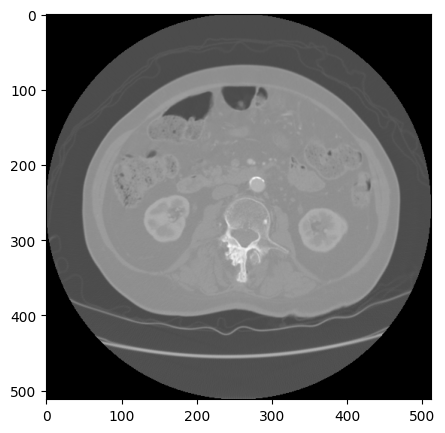

In [65]:
vol = scan.to_volume()
print(vol.shape) # (dim, dim, depth)

plt.figure(figsize=(5, 5))
plt.imshow(vol[:,:,0])
plt.show() # show the first-level slice

In [66]:
pid = 'LIDC-IDRI-0001'
annot = pl.query(pl.Annotation).filter(pl.Scan.patient_id == pid).first()

In [67]:
annot.print_formatted_feature_table()

Feature              Meaning                    # 
-                    -                          - 
Subtlety           | Obvious                  | 5 
Internalstructure  | Soft Tissue              | 1 
Calcification      | Absent                   | 6 
Sphericity         | Ovoid                    | 3 
Margin             | Near Sharp               | 4 
Lobulation         | No Lobulation            | 1 
Spiculation        | No Spiculation           | 1 
Texture            | Solid                    | 5 
Malignancy         | Indeterminate            | 3 


In [68]:
pid = 'LIDC-IDRI-0201'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()

Loading dicom files ... This may take a moment.
(512, 512, 133)


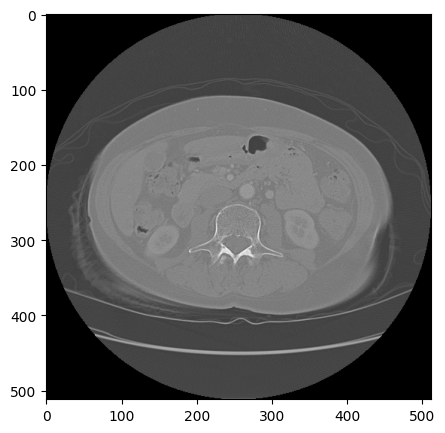

In [69]:
vol = scan.to_volume()
print(vol.shape) # (dim, dim, depth)

plt.figure(figsize=(5, 5))
plt.imshow(vol[:,:,0])
plt.show() # show the first-level slice

In [70]:
pid = 'LIDC-IDRI-0201'
annoti = pl.query(pl.Annotation).filter(pl.Scan.patient_id == pid).first()

In [71]:
annoti.print_formatted_feature_table()

Feature              Meaning                    # 
-                    -                          - 
Subtlety           | Obvious                  | 5 
Internalstructure  | Soft Tissue              | 1 
Calcification      | Absent                   | 6 
Sphericity         | Ovoid                    | 3 
Margin             | Near Sharp               | 4 
Lobulation         | No Lobulation            | 1 
Spiculation        | No Spiculation           | 1 
Texture            | Solid                    | 5 
Malignancy         | Indeterminate            | 3 


In [12]:
pip install pydicom

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pydicom
from pydicom import dcmread

In [3]:
pydicom.dcmread("1-001.dcm")["malignantcy"]

KeyError: "'malignantcy'"

In [16]:
dcmread("1-004.dcm")

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.149074554269719145171022201528
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.14907

In [17]:
dcmread("1-077.dcm")

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.115442980231714729764605769881
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.11544

In [18]:
dcmread("1-008.dcm")

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.291966760277580859548653846968
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.29196

In [20]:
dcmread("1-008.dcm")["SOPInstanceUID"]

(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.291966760277580859548653846968

In [38]:
dcmread("1-001.dcm")["SeriesInstanceUID"]

(0020, 000e) Series Instance UID                 UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636438705059720603192

KeyError: "'noduleID'"

# New Dataset

In [4]:
pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 1.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
df = pd.read_excel('tcia-diagnosis-data-2012-04-20.xls')

In [12]:
df

,TCIA Patient ID,"Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n",Diagnosis Method\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response,Primary tumor site for metastatic disease,"Nodule 1\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 1\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 2\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 2\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 3\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 3\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 4\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 4\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 5\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 5\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n
0,LIDC-IDRI-0068,3,4,Head & Neck Cancer,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LIDC-IDRI-0071,3,1,Head & Neck,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LIDC-IDRI-0072,2,4,Lung Cancer,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LIDC-IDRI-0088,3,0,Uterine Cancer,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LIDC-IDRI-0090,2,3,NSCLC,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,LIDC-IDRI-0994,2,3,LUL Large cell CA,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,LIDC-IDRI-1002,2,2,non-small cell carcinoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,LIDC-IDRI-1004,2,3,LUL NSCLC,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,LIDC-IDRI-1010,0,0,lymphoma,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df["TCIA Patient ID"]

0      LIDC-IDRI-0068
1      LIDC-IDRI-0071
2      LIDC-IDRI-0072
3      LIDC-IDRI-0088
4      LIDC-IDRI-0090
            ...      
152    LIDC-IDRI-0994
153    LIDC-IDRI-1002
154    LIDC-IDRI-1004
155    LIDC-IDRI-1010
156    LIDC-IDRI-1011
Name: TCIA Patient ID, Length: 157, dtype: object

In [31]:
path = "LIDC-IDRI"

malignant = []
begnin = []

In [32]:
for i in range(len(df)):
    if df.loc[i, "Diagonsis"] < 1:
        begnin.append(df.loc[i, "TCIA Patient ID"])
    else:
        malignant.append(df.loc[i, "TCIA Patient ID"])